<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/hw8gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [140]:
import pandas as pd # data frame library
import numpy as np
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/Height-Weight Data.csv'

df=pd.read_csv(path)
df.head(5)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [141]:
df.shape

(3501, 2)

In [142]:
n=len(X)
n

3501

In [143]:
df.isna().sum()

Height    0
Weight    0
dtype: int64

In [144]:
X=df['Height']
y=df['Weight']

In [145]:
X.head(3)

0    73.847017
1    68.781904
2    74.110105
Name: Height, dtype: float64

In [146]:
y.head(3)

0    241.893563
1    162.310473
2    212.740856
Name: Weight, dtype: float64

**GRADENT DESCENT for Linear Regression**

In [149]:
m=0
c=0
L=.0001
iterations=1000
n=len(X) # total no of sample of X
for a in range(iterations):
  y_pred = m*X + c
  deri_m = (-2/n)*sum(X*(y - y_pred))
  deri_c = (-2/n)*sum(y - y_pred)
  #calculate the value of  m and c
  m= m - (L * deri_m)
  c= c - (L * deri_c)
  print (m,c)



2.5897468877894476 0.037378251595892566
2.707044448015893 0.038997876893657316
2.7123582259954127 0.03899789926807571
2.712599961710048 0.0389245655591103
2.7126119711888 0.03884790938382877
2.712613575757172 0.038771102750343144
2.7126147090592156 0.038694289327306904
2.7126158210159956 0.03861747562185409
2.712616932005629 0.03854066192871003
2.712618042951094 0.038463848261223614
2.7126191538941966 0.03838703461999945
2.7126202648368287 0.03831022100506489
2.7126213757790762 0.038233407416421186
2.7126224867209436 0.03815659385406838
2.712623597662431 0.03807978031800646
2.7126247086035375 0.03800296680823542
2.7126258195442645 0.03792615332475526
2.712626930484611 0.03784933986756595
2.7126280414245767 0.0377725264366675
2.712629152364163 0.037695713032059895
2.7126302633033683 0.03761889965374312
2.7126313742421937 0.037542086301717174
2.7126324851806385 0.037465272975982046
2.7126335961187036 0.03738845967653773
2.712634707056388 0.037311646403384205
2.7126358179936925 0.03723483

In [150]:
#Last iteration
print (m,c)

2.713717690401167 -0.037568787153150304


**value of y_pred_01 for 1st Iteration**

In [151]:
m1= 2.5897468877894476 
c1=0.037378251595892566
X1= 73.847017
y_actual_01 = 241.893563
y_pred_01 = m1*X1 + c1
y_pred_01 #191.28 as 1st iteration will not provide of good cost estimation

191.28246069988032

**Predicted Value of y at Global Minima**

In [152]:
m2=2.713717690401167
c2=-0.037568787153150304
X2= 73.847017
y_actual_02 = 241.893563
y_pred_02 = m2*X2 + c2
y_pred_02 #200.36 using the value of m and c for Global Minima

200.36238762910253

In [153]:
m2=2.713717690401167
c2=-0.037568787153150304
X3= 69.881796
y_actual_03 = 206.349801
y_pred_03 = m2*X2 + c2
y_pred_03 #200.36 using the value of m and c for Global Minima

200.36238762910253

**Prepare Model For Linear Regression**



In [154]:
df.head(3)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856


In [155]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [156]:
reg.fit(df[['Height']],df['Weight'])

LinearRegression()

In [157]:
X_test = 73.847017 
y_pred_lr = reg.predict([[X_test]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [158]:
#predicted value of y
y_pred_lr

array([215.62645694])

In [159]:
#value Coefficient or Slope
m_lr= reg.coef_
m_lr

array([5.95843786])

In [160]:
#value y intercept
c_lr= reg.intercept_
c_lr

-224.38640537131286

**y value Prediction comparision for different measurements**

/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


<BarContainer object of 4 artists>

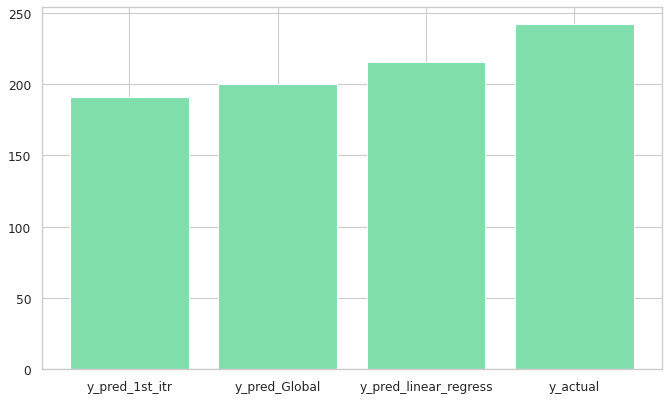

In [161]:
from matplotlib.pyplot import figure
figure(figsize=(10, 6), dpi=80)
y_prediction= ['y_pred_1st_itr', 'y_pred_Global', 'y_pred_linear_regress', 'y_actual']
y_value=[y_pred_01, y_pred_02, y_pred_lr, y_actual_02 ]
plt.bar(y_prediction, y_value, color='#80dead')


**MSE for Global Minima VS Linear Model**

In [162]:
#MSE For Global Minima
MSE_G = (1/n)*(y_actual_02-y_pred_02)**2
MSE_G=MSE_G*100
MSE_G

49.26702449837877

In [163]:
#MSE For Linear Model
MSE_lr = (1/n)*(y_actual_02-y_pred_lr)**2
MSE_lr=MSE_lr*100
MSE_lr

array([19.70753673])

/usr/local/lib/python3.7/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


<BarContainer object of 2 artists>

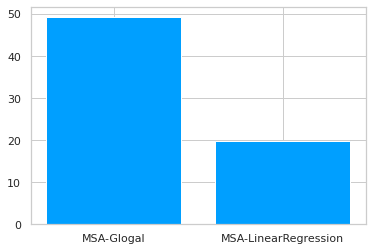

In [164]:
MSE= ['MSA-Glogal', 'MSA-LinearRegression']
value=[MSE_G, MSE_lr]
plt.bar(MSE, value, color='#009fff')
